In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline  
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
dataset = pd.read_csv("StockMarket.csv")
# Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True) 
indexedDataset = dataset.set_index(['Month'])

In [3]:
from datetime import datetime
indexedDataset.head(5)



,#Price
Month,
2007-01-01,12938.08984
2007-02-01,13072.09961
2007-03-01,13872.37012
2007-04-01,14544.45996
2007-05-01,14650.50977


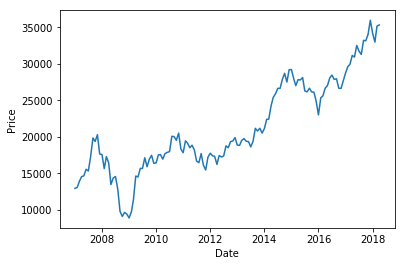

In [4]:
## plot graph

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(indexedDataset)


In [5]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() 

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)


                  #Price
Month                   
2007-01-01           NaN
2007-02-01           NaN
2007-03-01           NaN
2007-04-01           NaN
2007-05-01           NaN
2007-06-01           NaN
2007-07-01           NaN
2007-08-01           NaN
2007-09-01           NaN
2007-10-01           NaN
2007-11-01           NaN
2007-12-01  16197.924967
2008-01-01  16584.644205
2008-02-01  16799.005940
2008-03-01  17083.584309
2008-04-01  17239.510172
2008-05-01  17140.434325
2008-06-01  17040.830972
2008-07-01  16977.991861
2008-08-01  16608.769367
2008-09-01  15771.275146
2008-10-01  14915.402669
2008-11-01  14028.762614
2008-12-01  13343.390055
2009-01-01  12619.464193
2009-02-01  12124.802490
2009-03-01  11634.464111
2009-04-01  11485.270752
2009-05-01  11571.290771
2009-06-01  11680.837402
...                  ...
2015-11-01  27371.138183
2015-12-01  27011.783202
2016-01-01  26493.606607
2016-02-01  26275.637370
2016-03-01  26158.579752
2016-04-01  26061.873210
2016-05-01  25996.780762


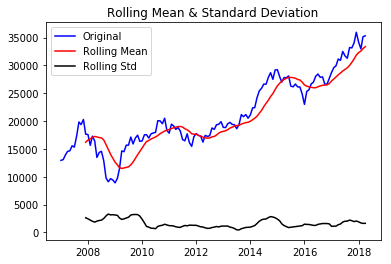

In [6]:
#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [7]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Price'], autolag='AIC') 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                  -0.247274
p-value                          0.932647
#Lags Used                       3.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


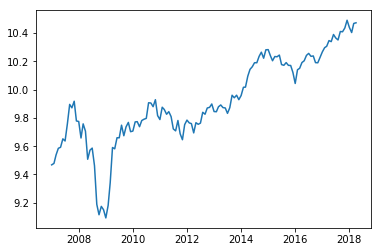

In [8]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


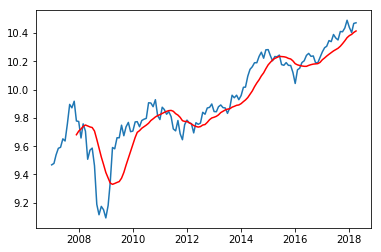

In [9]:

movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')



In [10]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)


#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Price
Month,
2007-12-01,0.097559
2008-01-01,0.068043
2008-02-01,-0.063500
2008-03-01,0.018018
2008-04-01,-0.043810
2008-05-01,-0.235146
2008-06-01,-0.164172
2008-07-01,-0.145527
2008-08-01,-0.245291


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


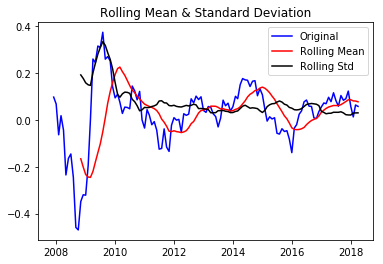

Results of Dickey-Fuller Test:
Test Statistic                  -4.613996
p-value                          0.000122
#Lags Used                       4.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

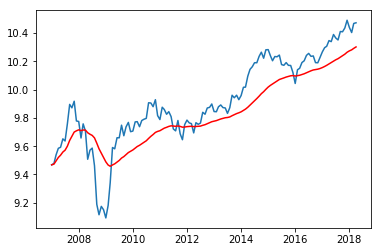

In [13]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

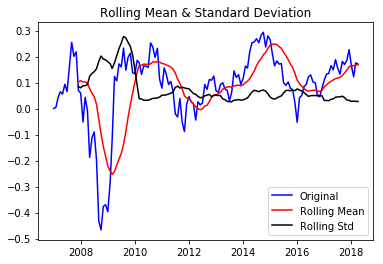

Results of Dickey-Fuller Test:
Test Statistic                  -3.484915
p-value                          0.008383
#Lags Used                       4.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [14]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

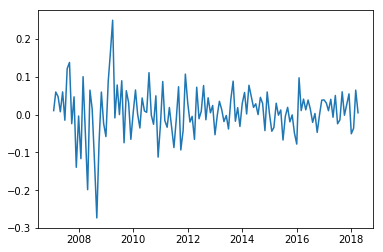

In [15]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)


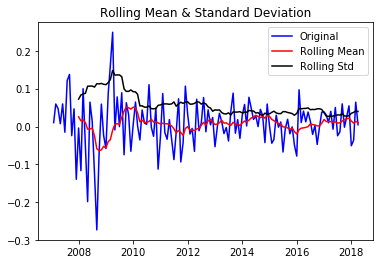

Results of Dickey-Fuller Test:
Test Statistic                  -5.068913
p-value                          0.000016
#Lags Used                      13.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

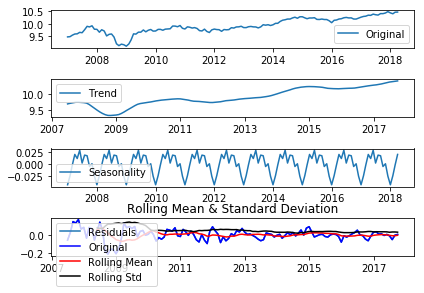

Results of Dickey-Fuller Test:
Test Statistic                -6.235614e+00
p-value                        4.833936e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)



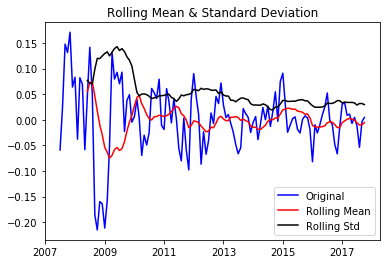

Results of Dickey-Fuller Test:
Test Statistic                -6.235614e+00
p-value                        4.833936e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64


In [18]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData )



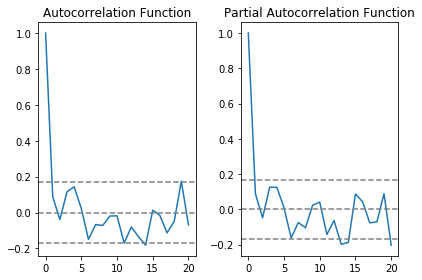

In [19]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


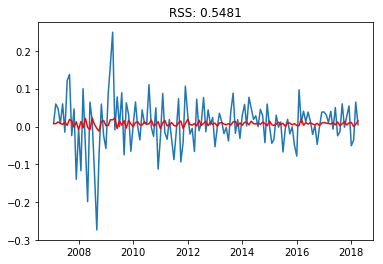

In [20]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["#Price"])**2))
print('Plotting AR model')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


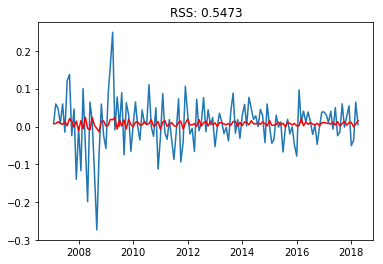

In [21]:

#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["#Price"])**2))
print('Plotting AR model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.5458')

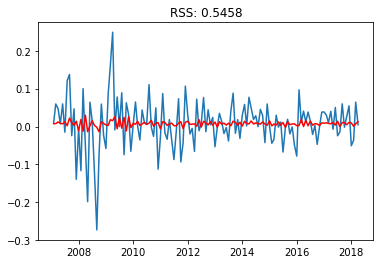

In [22]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Price"])**2))

In [23]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2007-02-01    0.007422
2007-03-01    0.007675
2007-04-01    0.012071
2007-05-01    0.008247
2007-06-01    0.007096
dtype: float64


In [24]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2007-02-01    0.007422
2007-03-01    0.015096
2007-04-01    0.027168
2007-05-01    0.035415
2007-06-01    0.042511
dtype: float64


In [25]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Price'].ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2007-01-01    9.467931
2007-02-01    9.475353
2007-03-01    9.483027
2007-04-01    9.495099
2007-05-01    9.503346
dtype: float64

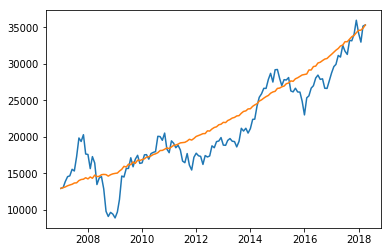

In [26]:
# change to exponential form to get back data in original format
predictions_ARIMA= np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

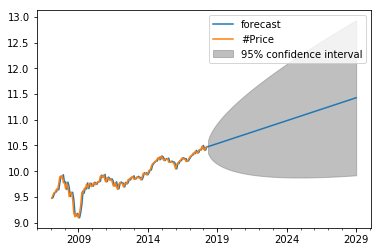

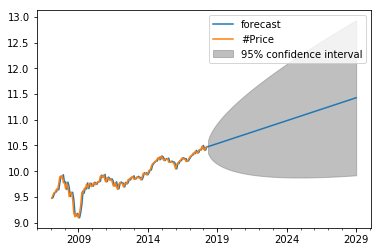

In [27]:
#pridiction with confidence level 
results_ARIMA.plot_predict(1,264)


In [28]:
indexedDataset_logScale

,#Price
Month,
2007-01-01,9.467931
2007-02-01,9.478235
2007-03-01,9.537654
2007-04-01,9.584965
2007-05-01,9.592230
2007-06-01,9.651880
2007-07-01,9.636823
2007-08-01,9.757947
2007-09-01,9.895354


In [29]:
predictions_ARIMA

Month
2007-01-01    12938.089840
2007-02-01    13034.472484
2007-03-01    13134.890951
2007-04-01    13294.409542
2007-05-01    13404.500849
2007-06-01    13499.955598
2007-07-01    13672.294817
2007-08-01    13697.651755
2007-09-01    14005.821440
2007-10-01    14149.481934
2007-11-01    14195.849681
2007-12-01    14395.490562
2008-01-01    14235.105287
2008-02-01    14502.498564
2008-03-01    14319.869512
2008-04-01    14754.234498
2008-05-01    14553.128732
2008-06-01    14584.851127
2008-07-01    14808.997983
2008-08-01    14852.025273
2008-09-01    14821.195045
2008-10-01    14616.827726
2008-11-01    14805.691151
2008-12-01    14924.679049
2009-01-01    14990.180364
2009-02-01    15035.581280
2009-03-01    15307.272833
2009-04-01    15544.234991
2009-05-01    15957.126962
2009-06-01    15862.852529
                  ...     
2015-11-01    28273.314004
2015-12-01    28468.557406
2016-01-01    28533.770585
2016-02-01    28602.599053
2016-03-01    29153.575598
2016-04-01    29153.55

In [202]:
results_ARIMA.forecast(steps=120)

(array([10.47621249, 10.48576593, 10.49184653, 10.50011209, 10.50700337,
        10.51475905, 10.52197104, 10.52952499, 10.53686386, 10.54433801,
        10.55172707, 10.55916965, 10.56657857, 10.57400866, 10.58142543,
        10.58885058, 10.59627047, 10.60369366, 10.61111477, 10.61853719,
        10.62595879, 10.63338091, 10.6408027 , 10.64822469, 10.65564656,
        10.66306851, 10.6704904 , 10.67791233, 10.68533424, 10.69275616,
        10.70017807, 10.70759999, 10.71502191, 10.72244382, 10.72986574,
        10.73728765, 10.74470957, 10.75213149, 10.7595534 , 10.76697532,
        10.77439723, 10.78181915, 10.78924106, 10.79666298, 10.8040849 ,
        10.81150681, 10.81892873, 10.82635064, 10.83377256, 10.84119448,
        10.84861639, 10.85603831, 10.86346022, 10.87088214, 10.87830406,
        10.88572597, 10.89314789, 10.9005698 , 10.90799172, 10.91541363,
        10.92283555, 10.93025747, 10.93767938, 10.9451013 , 10.95252321,
        10.95994513, 10.96736705, 10.97478896, 10.9